In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default, horiz_merge
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import Image
from fluentopt.utils import flatten_dict
import seaborn as sns
from scipy.stats import binned_statistic
pd.options.display.max_columns = 100
sns.set_style('white')

def show_several(df, nb=100):
    for j in df.index:
        print(j)
        show_one(j, nb=nb)
def show_one(j, nb=100):
    try:
        X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:nb]
    except Exception:
        return
    X = grid_of_images_default(X, border=5, bordercolor=(0, 0, 0))
    imsave('out.png', X)
    im = Image('out.png')
    display(im)

In [3]:
df_full = pd.read_csv('../../export/hypers.csv')
df_full = df_full.set_index('job_id')
#df_full['letters'] = 0.5 * df_full['letters_object'] + 0.5 * df_full['letters_diversity']

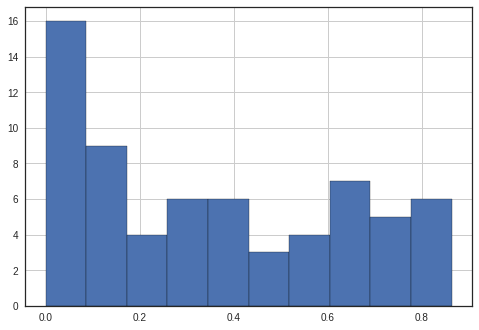

In [7]:
df = df_full
df['delta'] = df['recons_digits'] - df['recons_hwrt']
df['delta'].hist(edgecolor='black')